# fit tempo rilassamento

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [2]:
def load_data_from_file(file_path):
    
    data = np.loadtxt(file_path, delimiter=',', skiprows=9)  # Presuppone un file txt con intestazione
    x = data[:, 0]
    y = data[:, 1]
    return x, y

In [3]:
file_path = "data/GruppoA_TimeRelaxation_20250325_152417_Traces.csv"
xT, yV = load_data_from_file(file_path)

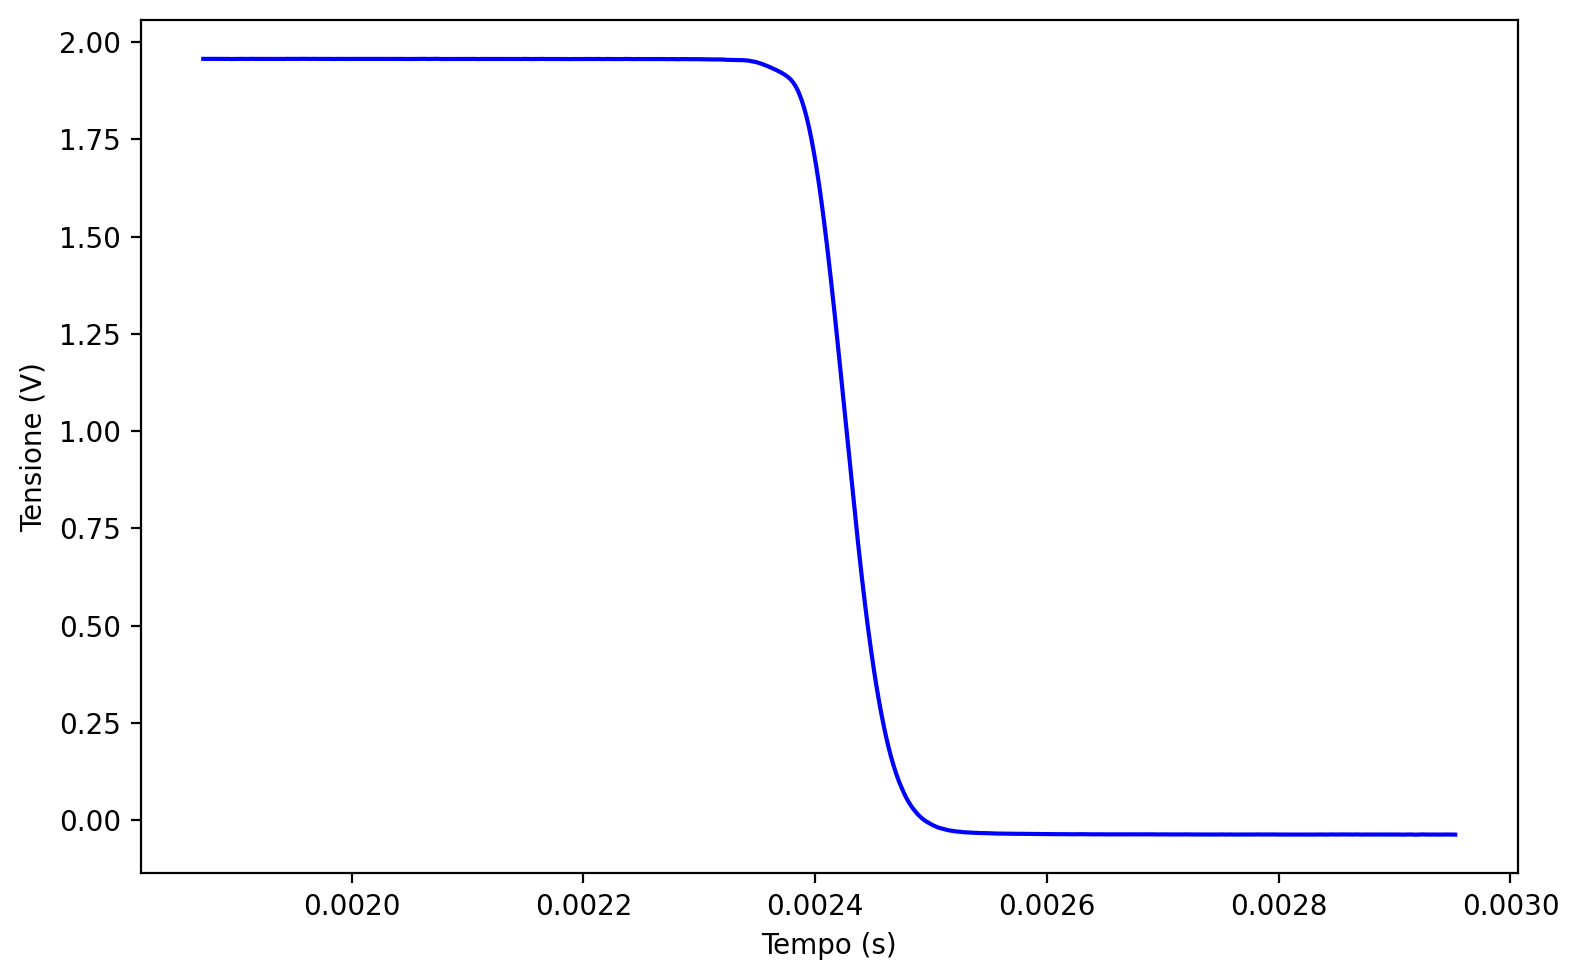

In [4]:
plt.figure(figsize=(8, 5), dpi=200)
plt.plot(xT, yV, marker='', linestyle='-', color='b')
plt.title('')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensione (V)')
plt.tight_layout()
#plt.grid()
plt.show()

In [5]:
def sigmoid(x, A, x0, tau, C):
    return A / (1 + np.exp(-(x - x0) / tau)) + C

In [6]:
popt, pcov = curve_fit(sigmoid, xT, yV, absolute_sigma=True, p0=[1, 0, 1, 0])

# Calcolo gli errori sui parametri dalla matrice di covarianza
errors = np.sqrt(np.diag(pcov))

In [7]:
A_fit, x0_fit, tau_fit, C_fit = popt
A_err, x0_err, tau_err, C_err = errors

print(f"A = {A_fit:.4f} ± {A_err:.4f}")
print(f"x0 = {x0_fit:.4f} ± {x0_err:.4f}")
print(f"tau = {tau_fit:.7f} ± {tau_err:.7f}")
print(f"C = {C_fit:.4f} ± {C_err:.4f}")

A = -1.9938 ± 0.0670
x0 = 0.0024 ± 0.0000
tau = 0.0000159 ± 0.0000046
C = 1.9584 ± 0.0460


In [8]:
# funzione
func = r"$\frac{A}{1 + e^{-\frac{(x - x0)}{\tau}}} + C$"

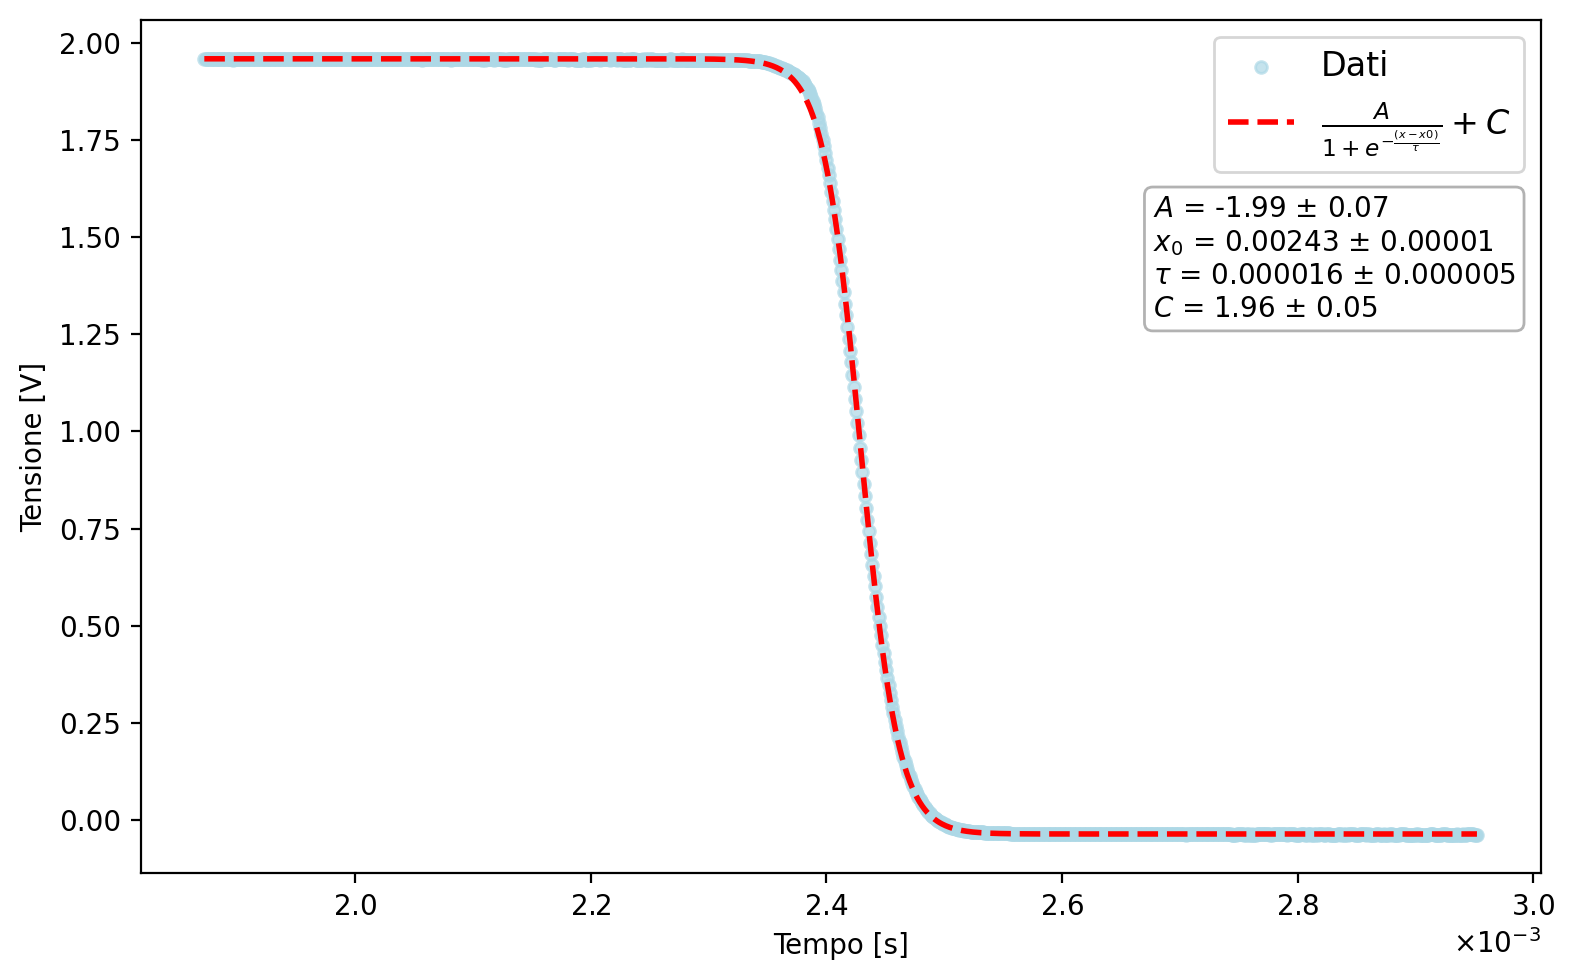

In [22]:
# Sostituire il blocco sopra con questo per aggiungere il pad:
fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.scatter(xT, yV, label="Dati", color="lightblue", alpha=0.7, marker='o', s=18)
ax.plot(xT, sigmoid(xT, *popt), color='r', label=func, linestyle='--', linewidth=2)

ax.set_xlabel("Tempo [s]")
ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0), useMathText=True)
ax.set_ylabel("Tensione [V]")
ax.legend(fontsize=12)

# Testo dei parametri (pad)
textstr = (
    fr"$A$ = {A_fit:.2f} ± {A_err:.2f}"+"\n"+
    fr"$x_0$ = {x0_fit:.5f} ± {x0_err:.5f}"+"\n"+
    fr"$\tau$ = {tau_fit:.6f} ± {tau_err:.6f}"+"\n"+
    fr"$C$ = {C_fit:.2f} ± {C_err:.2f}"
)
ax.text(
    0.723, 0.72, textstr,
    transform=ax.transAxes,
    ha='left', va='center',
    fontsize=10,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.6, edgecolor='gray')
)

fig.tight_layout()
plt.show()

In [24]:
# calcolo del chi quadro ridotto
residuals = yV - sigmoid(xT, *popt)
ss_res = np.sum(residuals**2)
degrees_of_freedom = len(yV) - len(popt)
chi_squared_reduced = ss_res / degrees_of_freedom
print(f"Chi quadro ridotto: {chi_squared_reduced}")

Chi quadro ridotto: 4.30959224508642e-05
